Homework 4: Sentiment Analysis - Task 3
----

Names & Sections
----
Names: Alec Condry (4120) and Shrihari Subramaniam (4120)

Task 3: Train a Logistic Regression Model (20 points)
----

Using `sklearn`'s implementation of `LogisticRegression`, conduct a similar analysis on the performance of a Logistic Regression classifier on the provided data set.

Using the `time` module, you'll compare and contrast how long it takes your home-grown BoW vectorizing function vs. `sklearn`'s `CountVectorizer`.


In [1]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import time
import sentiment_utils as sutils
import random

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hsubr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

# some variables you may want to use
BINARIZED = False
USE_COUNT_VECTORIZER = False

In [3]:
# Write the functions needed (here or in sentiment_utils.py) to create vectorized BoW representations
# of your data. We recommend starting with a multinomial BoW representation.
# Each training example should be represented as a sparse vector.

vocab = sutils.create_index(train_tups)

reviews_train = train_tups[0]
reviews_test = dev_tups[0]

y_train = train_tups[1]
y_test = dev_tups[1]

print(f'Vocab size: {len(vocab)}')

Vocab size: 30705


In [4]:
# how much time does it take to featurize the all data with your implementation?

start = time.time()

X_train_multi = sutils.featurize(vocab=vocab, data_to_be_featurized_X=reviews_train, binary=BINARIZED, verbose=False)
X_test_multi = sutils.featurize(vocab=vocab, data_to_be_featurized_X=reviews_test, binary=BINARIZED, verbose=False)

X_train_bi = sutils.featurize(vocab=vocab, data_to_be_featurized_X=reviews_train, binary=not BINARIZED, verbose=False)
X_test_bi = sutils.featurize(vocab=vocab, data_to_be_featurized_X=reviews_test, binary=not BINARIZED, verbose=False)

end = time.time()
print("That took:", end - start, "seconds")



That took: 48.22927522659302 seconds


In [5]:
# how much time does it take to featurize the all data with sklearn's CountVectorizer?

d = {idx: token for idx, token in enumerate(train_tups[0])}

train_lines = sutils.generate_lines_from_file(TRAIN_FILE)
test_lines = sutils.generate_lines_from_file(DEV_FILE)


start = time.time()

#Making a count vectorizer while passing in our already parsed tokens
vectorizer = CountVectorizer()
X_train_cw_multi = vectorizer.fit_transform(train_lines[0]).toarray()

# vocab from count vectorizer
vocab_cw = vectorizer.get_feature_names_out()
print(f'Vocab: {vocab_cw}')
print(f'Vocab size: {len(vocab_cw)}')

vectorizer = CountVectorizer(vocabulary=vocab_cw)
X_test_cw_multi = vectorizer.fit_transform(test_lines[0]).toarray()


vectorizer = CountVectorizer(vocabulary=vocab_cw, binary=True)
X_train_cw_bi = vectorizer.fit_transform(train_lines[0]).toarray()

vectorizer = CountVectorizer(vocabulary=vocab_cw, binary=True)
X_test_cw_bi = vectorizer.fit_transform(test_lines[0]).toarray()


end = time.time()
print("That took:", end - start, "seconds")

Vocab: ['00' '000' '007' ... 'çetin' 'émigré' 'ünfaithful']
Vocab size: 22601
That took: 1.6576640605926514 seconds


1. How big is your vocabulary using your vectorization function(s)? 30705
2. How big is your vocabulary using the `CountVectorizer`? 22601

In [6]:
#  write any code you need analyze the relative sparsity of your vectorized representations of the data
percentages = []
for i in X_train_bi:
    counts = Counter(i)
    percentage = counts[0] / (counts[0] + counts[1])
    percentages.append(percentage * 100)


# Print out the average % of entries that are zeros in each vector in the vectorized training data

average = sum(percentages)/len(percentages)
print(f'Average % of entries that are zeros in each vector: {round(average, 2)}%')

Average % of entries that are zeros in each vector: 99.51%


In [7]:
model_multi = LogisticRegression()
model_multi.fit(X_train_multi, y_train)

model_bi = LogisticRegression()
model_bi.fit(X_train_bi, y_train)

model_multi_cw = LogisticRegression()
model_multi_cw.fit(X_train_cw_multi, y_train)

model_bi_cw = LogisticRegression()
model_bi_cw.fit(X_train_cw_bi, y_train)

C:\Users\hsubr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hsubr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

LogisticRegression()

In [8]:
lr_preds_multi = model_multi.predict(X_test_multi)
lr_preds_bi = model_bi.predict(X_test_bi)

print("First 20 assigned predictions for multinomial model:", lr_preds_multi[:20])
print("First 20 assigned predictions for binomial model:   ", lr_preds_bi[:20])

First 20 assigned predictions for multinomial model: [1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0]
First 20 assigned predictions for binomial model:    [1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1]


In [9]:
lr_preds_multi_cw = model_multi_cw.predict(X_test_cw_multi)
lr_preds_bi_cw = model_bi_cw.predict(X_test_cw_bi)

print("First 20 assigned predictions for count vectorizer multinomial model:", lr_preds_multi_cw[:20])
print("First 20 assigned predictions for count vectorizer binomial model:   ", lr_preds_bi_cw[:20])

First 20 assigned predictions for count vectorizer multinomial model: [1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1]
First 20 assigned predictions for count vectorizer binomial model:    [1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1]


In [11]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)


print("Binarized Logistic Regression:")
sutils.get_prfa(y_test, lr_preds_bi, verbose=True)
print()
print("Multinomial Logistic Regression:")
sutils.get_prfa(y_test, lr_preds_multi, verbose=True)
print()
print("Binarized Logistic Regression with Count Vectorizer:")
sutils.get_prfa(y_test, lr_preds_bi_cw, verbose=True)
print()
print("Multinomial Logistic Regression with Count Vectorizer:")
sutils.get_prfa(y_test, lr_preds_multi_cw, verbose=True)

# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

# takes approx 30 sec on Felix's computer

Binarized Logistic Regression:
Precision = 0.7876106194690266
Recall =    0.8476190476190476
f1 score =  0.81651376146789
Accuracy =  0.8

Multinomial Logistic Regression:
Precision = 0.7830188679245284
Recall =    0.7904761904761904
f1 score =  0.7867298578199052
Accuracy =  0.775

Binarized Logistic Regression with Count Vectorizer:
Precision = 0.7719298245614035
Recall =    0.8380952380952381
f1 score =  0.8036529680365297
Accuracy =  0.785

Multinomial Logistic Regression with Count Vectorizer:
Precision = 0.7798165137614679
Recall =    0.8095238095238095
f1 score =  0.794392523364486
Accuracy =  0.78


(0.7798165137614679, 0.8095238095238095, 0.794392523364486, 0.78)

Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
- your vectorized features, multinomial: .7867
- CountVectorizer features, multinomial: .7944
- your vectorized features, binarized: .8165
- CountVectorizer features, binarized: .8037

Produce your graph(s) for the combination with the best final f1 score.




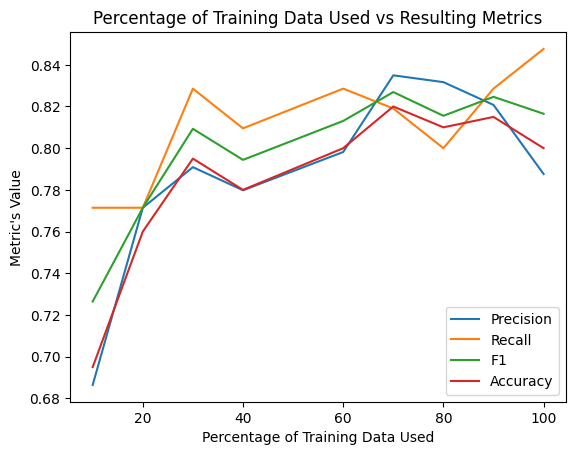

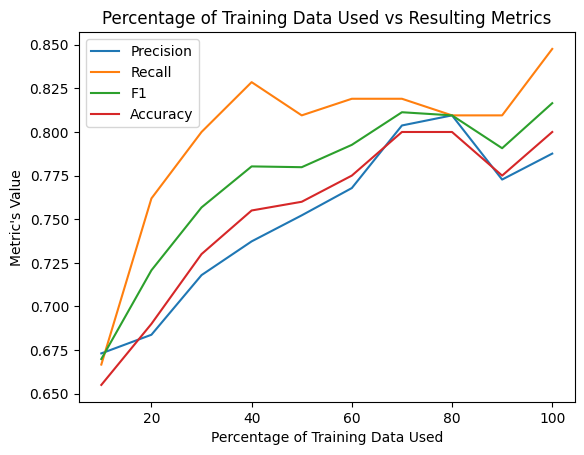

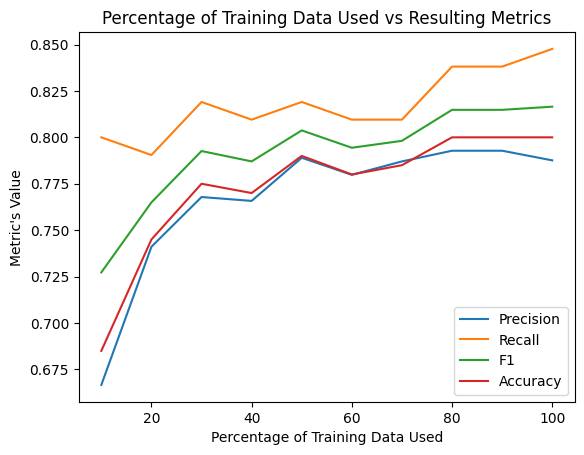

In [12]:
# Combination for the best final f1 score is where I have my own vectorized features and it is binarized

num_classifiers = 10
metrics = []
data_len = len(X_train_bi)

for p in range(3):
    metrics = []
    indices_list = [x for x in range(0, data_len)]
    random.shuffle(indices_list)
    
    for i in range(data_len//num_classifiers, data_len+1, data_len//num_classifiers):
        new_X_train = [X_train_bi[j] for j in indices_list[0:i]]
        new_y_train = [y_train[j] for j in indices_list[0:i]]
        
        model_bi.fit(new_X_train, new_y_train)
        preds = model_bi.predict(X_test_bi)
        
        metrics.append(sutils.get_prfa(y_test, preds))
        
        
    sutils.create_training_graph(metrics, "LogisticRegression", p, "./", False)
        
        

6120 REQUIRED
----

Find the top 100 most important features to your Logistic Regression classifier when using 100% of the training data. To access the weights of your model, you can access the `model.coef_` attribute. You'll want to use a `StandardScalar` preprocessor. This will help us deal with the fact that we expect counts of certain words to be higher (e.g. stop words).

To find the importance of a feature, calculate the absolute value of each weight in the model, then order your features according to the absolute values of these weights. The feature with the heighest absolute value weight has the most importance.

Use __your__ (not CountVectorizer) multinomial vectors for this analysis.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
# YOUR CODE HERE
# train a model on the scaled inputs
# This takes Felix's computer about 6.5 sec to run




In [ ]:
# print out the top 20 most informative features according to this model


In [ ]:
# re-evalaute your LR model with inputs that have been filtered to only use the top 500 most informative features


In [ ]:
# create the same graph as before, but with the filtered inputs
